In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read in csv from Taxi.csv
df = pd.read_csv('Temp.csv')

In [3]:
# Z-normalize the data
df['value'] = (df['value'] - df['value'].mean()) / df['value'].std()

# Make the middle 20% index (0.4 to 0.6)datapoints to a sinusoid
# df['value'][int(len(df)*0.4):int(len(df)*0.6)] = np.sin(np.linspace(0, 2*np.pi, int(len(df)*0.2)))


# # Append 400 rows to the end of the dataframe with value = df.mean()
# mean = df['value'].mean()
# for i in range(400):
#     df = df.append({'value': mean}, ignore_index=True)

In [4]:
df

,timestamp,value
0,1723-01,-1.711172
1,1723-02,-1.017255
2,1723-03,-0.365393
3,1723-04,-0.071004
4,1723-05,0.517774
...,...,...
2971,1970-08,1.421969
2972,1970-09,1.085524
2973,1970-10,0.307496
2974,1970-11,-0.302310


In [5]:
window_length = int(0.1 * len(df))

In [6]:
def analyse_time_series(df, window_length):
    kurtosis_list = np.array([])
    skew_list = np.array([])
    snr_list = np.array([])
    app_entropy_list = np.array([])

    for i in range(0, len(df)-window_length):
        # Get the window
        window = df['value'][i:i+window_length]
        # Calculate the kurtosis
        kurtosis = window.kurtosis()
        # Append the kurtosis to the list
        kurtosis_list = np.append(kurtosis_list, kurtosis)
        # Calculate the skew
        skew = window.skew()
        # Append the skew to the list
        skew_list = np.append(skew_list, skew)
        # Calculate the signal to noise ratio
        snr = window.mean() / window.std()
        snr = snr**2
        # Append the snr to the list
        snr_list = np.append(snr_list, snr)


    # Scale the snr_list to fit between -3 and 3
    snr_list = (snr_list - np.min(snr_list)) / (np.max(snr_list) - np.min(snr_list))
    snr_list = snr_list * 6 - 3
    
    plt.figure(figsize=(15, 5))
    # Cap the y-axis to have range of time series
    plt.plot(df['value'], label='Time Series')
    # plt.plot(kurtosis_list, label='Kurtosis')
    # plt.plot(skew_list, label='Skew')
    plt.plot(snr_list, label='SNR')
    plt.legend()

    return kurtosis_list, skew_list, snr_list




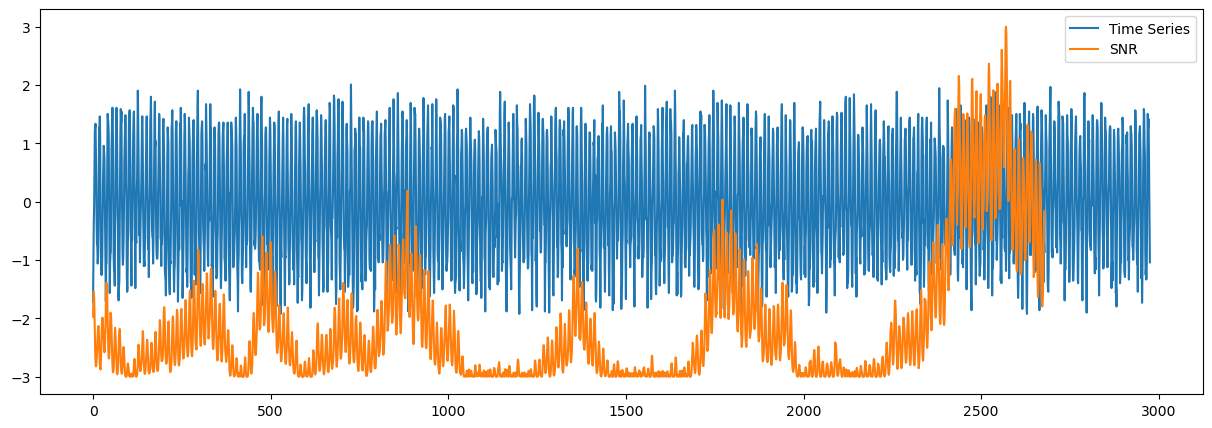

In [7]:
kurtosis_list, skew_list, snr_list = analyse_time_series(df, window_length)